In [1]:
from paddle.trainer_config_helpers import *
from paddle.trainer.PyDataProvider2 import *
from py_paddle.trainer import *
import py_paddle.swig_paddle as api

In [2]:
@network(inputs={
    'x': dense_vector(1), 'y': dense_vector(1)
}, learning_rate=1e-3, batch_size=12)
def linear_network(x, y):
    y_predict = fc_layer(input=x, param_attr=ParamAttr(name='w'), size=1,
                         act=LinearActivation(), bias_attr=ParamAttr(name='b'))
    cost = regression_cost(input=y_predict, label=y)
    return cost


In [3]:
linear = linear_network()

In [4]:
configs = {
    'w': 2,
    'b': 0.3
}

In [5]:
import random

@linear.provider()
def process(*args, **kwargs):
    for i in xrange(2000):
        x = random.random()
        yield {'x': [x], 'y': [configs['w'] * x + configs['b']]}


In [6]:
runner = RunnerBuilder(network=linear).with_train_data(method=process).build()

In [7]:
learning_result = {
    'cost': [],
    'w': [],
    'b': []
}

with runner:
    while True:
        ctx = ContextWrapper(runner.run_one_pass())
        learning_result['cost'].append(ctx.cost())
        params = ctx.gradient_machine().getParameters()
        for param in params:
            learning_result[param.getName()].append(param.getBuf(api.PARAMETER_VALUE)[0])
        
        if abs(ctx.cost() - 0.0) < 1e-10:
            # end training.
            break

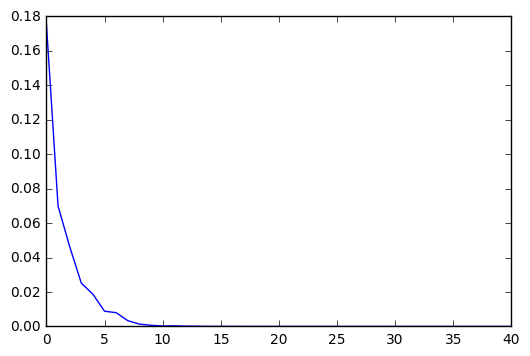

In [8]:
% matplotlib inline
import matplotlib.pyplot as plt

plt.plot("cost", data=learning_result)
plt.show()


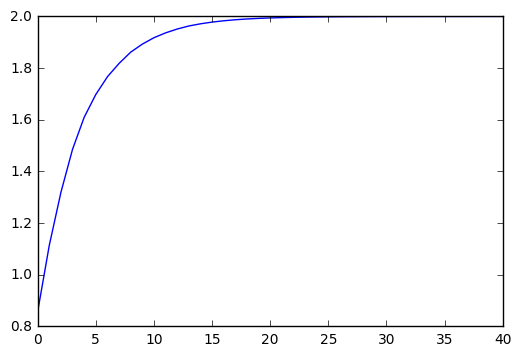

In [9]:
plt.plot("w", data=learning_result)
plt.show()


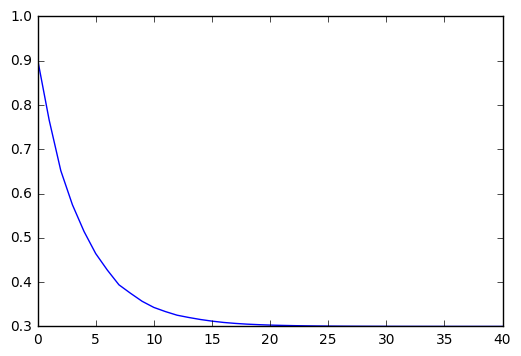

In [10]:
plt.plot("b", data=learning_result)
plt.show()
